In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv('Heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_data.shape


(1025, 14)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#check missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#Exploratory Data Analysis(EDA)

<ipython-input-11-a2bcb2142675>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[column])
<ipython-input-11-a2bcb2142675>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data[column])
<ipython-input-11-a2bcb2142675>:12: UserWarning: 

`distplot` is a deprecated function and w

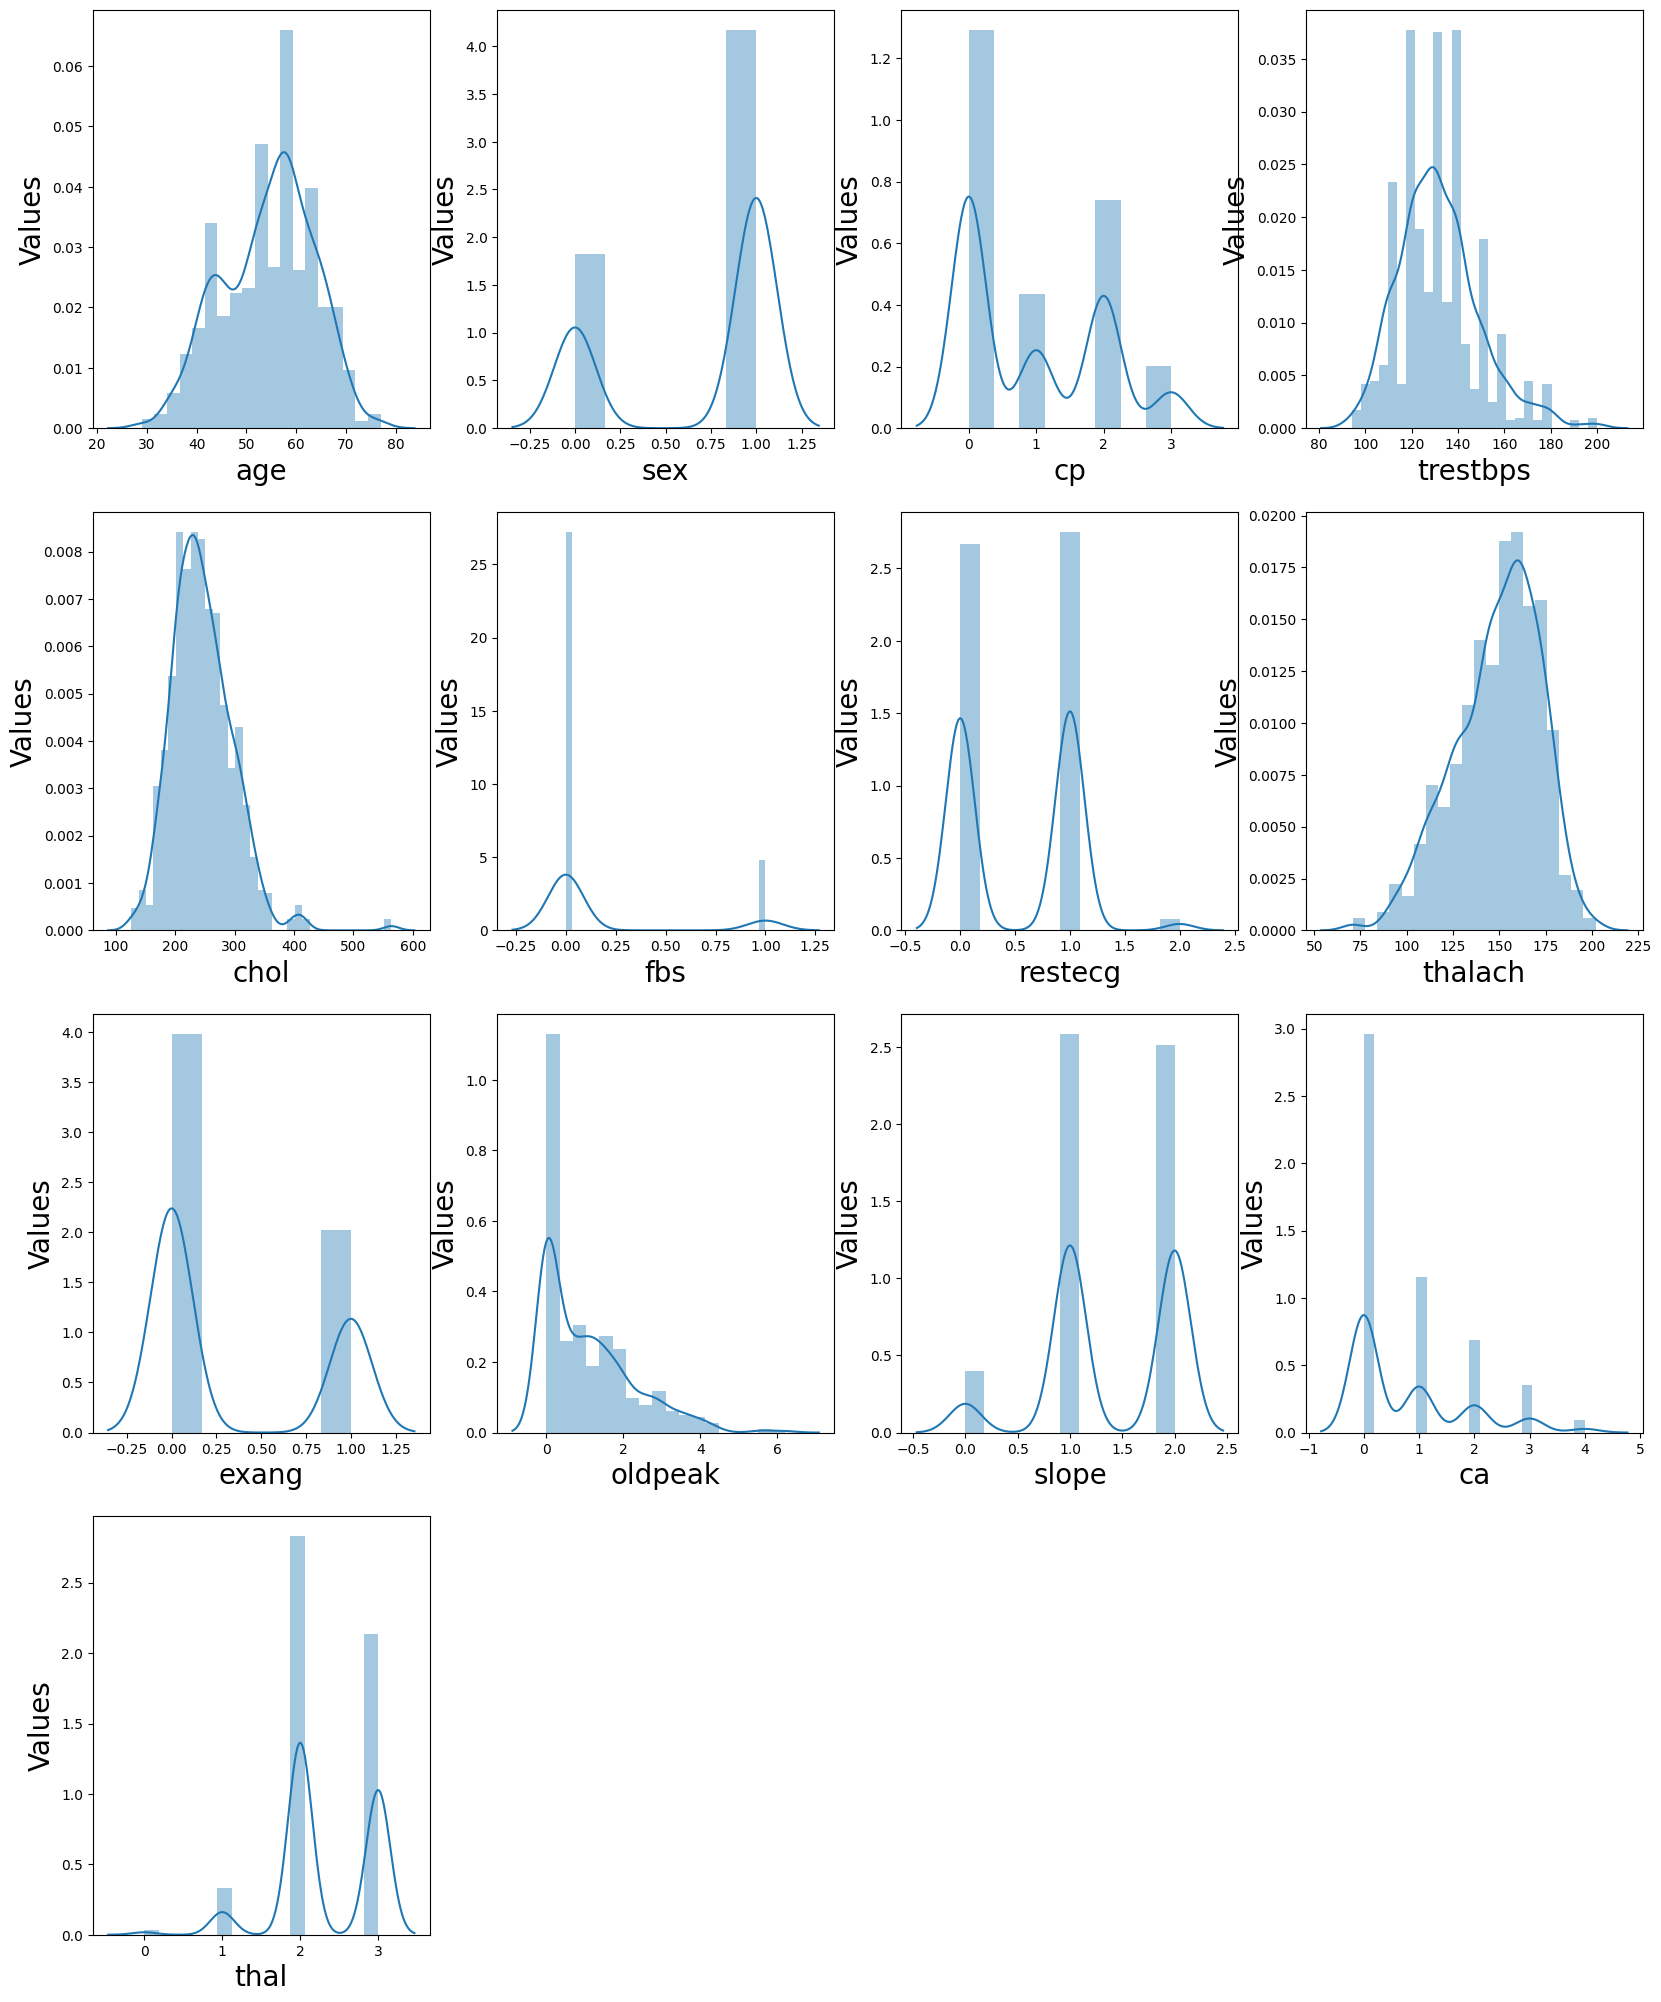

In [11]:
#Plotting the distribution plot.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_data:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

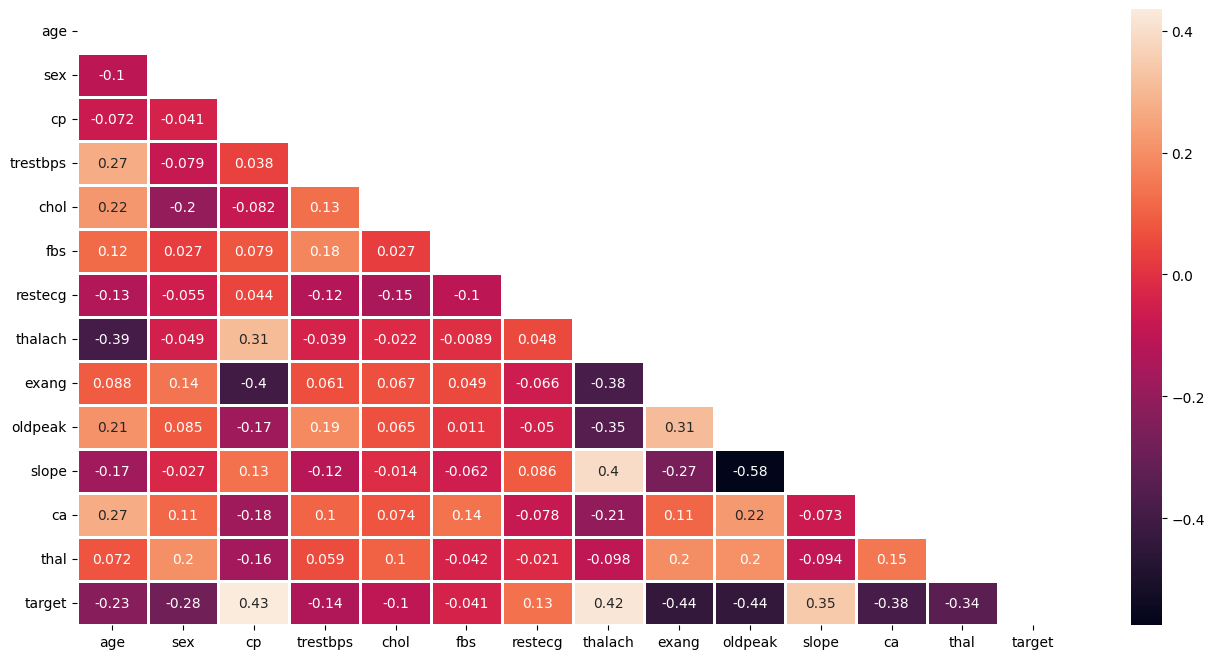

In [12]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [13]:
# checking the variance
heart_data.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

# Normalization

In [14]:
heart_data['trestbps']=np.log(heart_data['trestbps'])
heart_data['chol']=np.log(heart_data['chol'])
heart_data['thalach']=np.log(heart_data['thalach'])

np.var(heart_data[["trestbps",'chol','thalach']])

trestbps    0.016843
chol        0.041430
thalach     0.027516
dtype: float64

In [15]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
x=heart_data.drop('target',axis=1)
y=heart_data['target']

In [17]:
print(x)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0      52    1   0  4.828314  5.356586    0        1  5.123964      0   
1      53    1   0  4.941642  5.313206    1        0  5.043425      1   
2      70    1   0  4.976734  5.159055    0        1  4.828314      1   
3      61    1   0  4.997212  5.313206    0        1  5.081404      0   
4      62    0   0  4.927254  5.683580    1        1  4.663439      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020   59    1   1  4.941642  5.398163    0        1  5.099866      1   
1021   60    1   0  4.828314  5.552960    0        0  4.948760      1   
1022   47    1   0  4.700480  5.616771    0        0  4.770685      1   
1023   50    0   0  4.700480  5.537334    0        0  5.068904      0   
1024   54    1   0  4.787492  5.236442    0        1  4.727388      0   

      oldpeak  slope  ca  thal  
0         1.0      2   2     3  
1         3.1      0   0     3  
2         2.6      0   0

In [18]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [19]:
#spliting the dataset

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (717, 13) (308, 13)


# Logistic Regression

In [21]:
model = LogisticRegression()

In [22]:
# training the LogisticRegression model with Training data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
accuracies ={}

y_pred0 = model.predict(x_test)

acc0=accuracy_score(y_test,y_pred0)
accuracies['LR']=acc0*100

##Accuracy Score


In [24]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [25]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8507670850767085


In [26]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [27]:
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.8831168831168831


#Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
accuracies['GradientBoosting']=acc*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Training accuracy score of the model is: 98.60529986052998 %
Testing accuracy score of the model is: 97.72727272727273 %


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred1 = rfc.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['RF']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 99.16317991631799 %
Testing accuracy score of the model is: 98.37662337662337 %


In [30]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[141   4]
 [  1 162]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.98      0.99      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



# XGBoost

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred2 = xgb.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)

accuracies['XGBoost']=acc2*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 98.18688981868898 %
Testing accuracy score of the model is: 97.40259740259741 %


In [33]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[138   7]
 [  1 162]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.95      0.97       145
           1       0.96      0.99      0.98       163

    accuracy                           0.97       308
   macro avg       0.98      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



<ipython-input-34-11ed4bf6978e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )


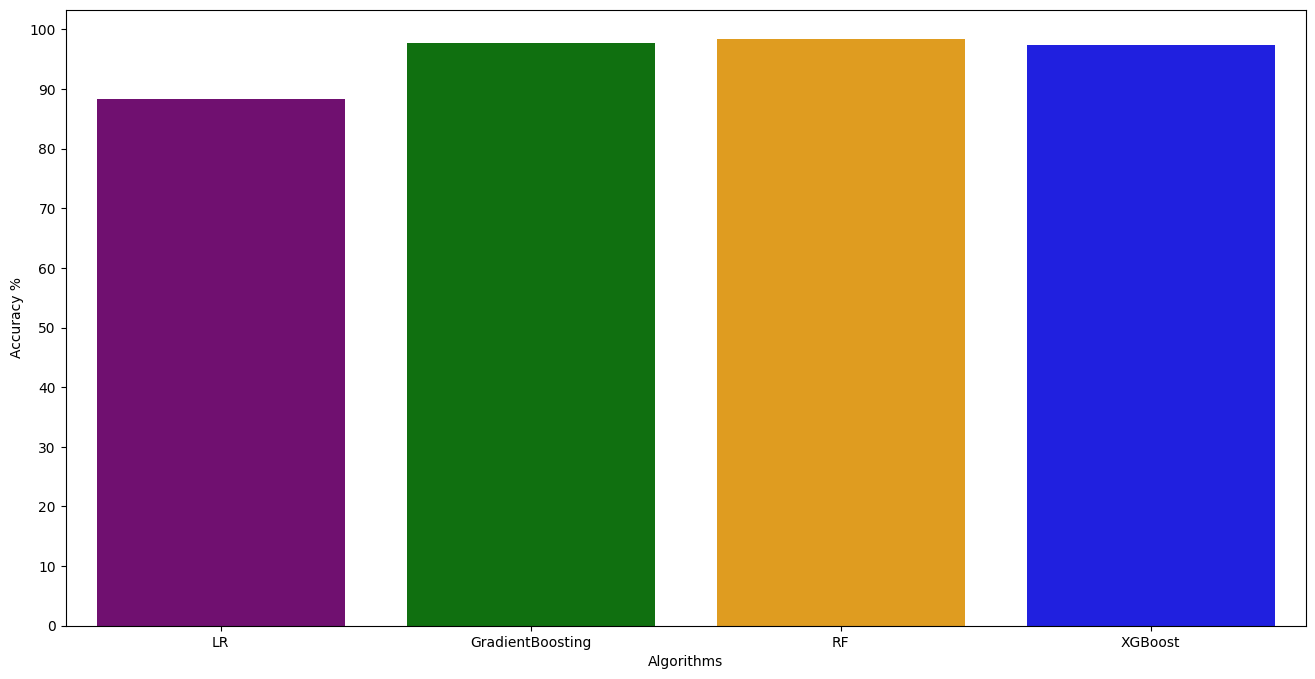

In [34]:
colors = ["purple", "green", "orange", "blue"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [35]:
models_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Boosting','Random Forest','XgBoost'],
    'Score': [acc0, acc, acc1, acc2]
})

models_df.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.983766
1,Gradient Boosting,0.977273
3,XgBoost,0.974026
0,Logistic Regression,0.883117


# Building a Predictive System

In [41]:
input_data = (59	,1,	1,	140,	221,	0	,1,	164,	1	,0.0	,2	,0	,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Saving the trained model

In [42]:
import pickle

In [43]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [45]:
for column in x.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
